In [1]:
from pyutils.pytorch.common import *
from pyutils.pytorch.detect import bbox_to_rect, multibox_prior, box_iou, show_bboxes

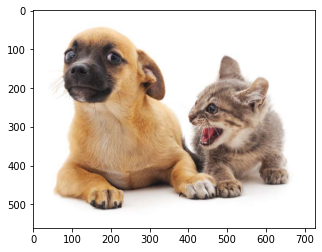

In [2]:
img = plt.imread('../img/catdog.jpg')
plt.imshow(img)
plt.show()

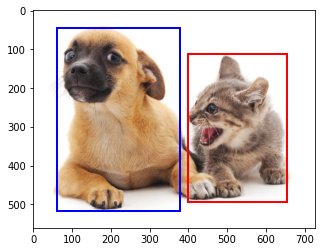

In [3]:
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]
fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, edgecolor='blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, edgecolor='red', fill=False))
plt.show()

In [4]:
h, w = img.shape[:2]

print('image size:',h, w)
X = torch.rand(size=(1, 3, h, w))
Y = multibox_prior(X, sizes=[0.75, 0.5, 0.25], ratios=[1, 2, 0.5])
Y.shape

image size: 561 728


/data2/users/tanganke/.anaconda3/envs/torch/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646756402876/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([1, 2042040, 4])

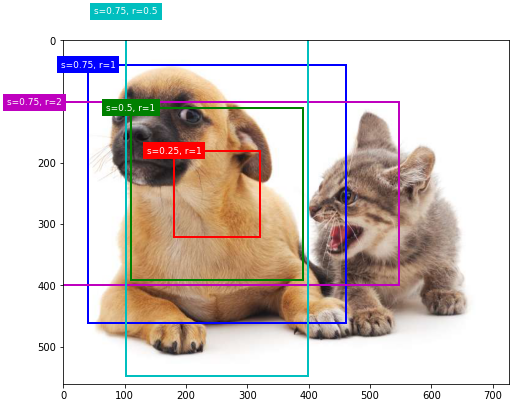

In [5]:
boxes = Y.reshape(h, w, 5, 4)
boxes[250, 250, 0, :]

bbox_scale = torch.tensor((w, h, w, h))
plt.figure(1,figsize=(8,8))
fig = plt.imshow(img)
show_bboxes(fig.axes, boxes[250, 250, :, :] * bbox_scale,
            ['s=0.75, r=1', 's=0.5, r=1', 's=0.25, r=1', 's=0.75, r=2',
             's=0.75, r=0.5'])

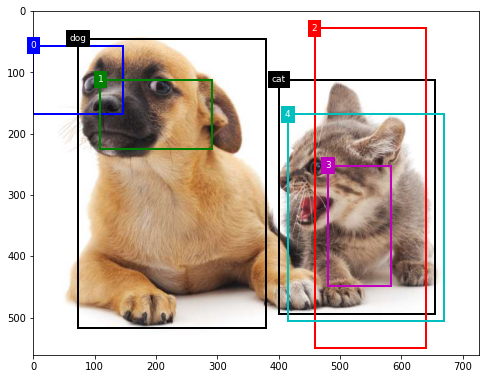

In [6]:
ground_truth = torch.tensor([[0, 0.1, 0.08, 0.52, 0.92],
                         [1, 0.55, 0.2, 0.9, 0.88]])
anchors = torch.tensor([[0, 0.1, 0.2, 0.3], [0.15, 0.2, 0.4, 0.4],
                    [0.63, 0.05, 0.88, 0.98], [0.66, 0.45, 0.8, 0.8],
                    [0.57, 0.3, 0.92, 0.9]])
                    
plt.figure(1,figsize=(8,8))
fig = plt.imshow(img)
show_bboxes(fig.axes, ground_truth[:, 1:] * bbox_scale, ['dog', 'cat'], 'k')
show_bboxes(fig.axes, anchors * bbox_scale, ['0', '1', '2', '3', '4'])